# Exploratory Data Analysis(EDA)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt

### Data Sourcing
### Data Cleaning
### Data Visualising


### Data Sourcing:- this Data is provided by company

In [2]:
sales=pd.read_excel('sales_data.xlsx')


In [3]:
sales.head()

,CustomerID,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,FIRST_ORDER_DATE,LATEST_ORDER_DATE,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER,...,WEEK3_DAY16_DAY23_REVENUE,WEEK4_DAY24_DAY31_REVENUE,TIME_0000_0600_ORDERS,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE
0,22,124,11986.54,96.67,529.59,4.27,2016-12-30,2021-10-24,14.19,1,...,2592.18,2409.71,12,61,37,14,1067.92,5674.65,3916.53,1327.44
1,29,82,11025.96,134.46,97.92,1.19,2018-03-31,2021-10-24,15.89,1,...,2807.66,4106.19,1,13,24,44,30.25,3143.69,2205.47,5646.55
2,83,43,7259.69,168.83,171.69,3.99,2017-11-30,2021-10-24,33.12,1,...,713.94,2861.90,0,6,12,25,0.00,707.98,2560.91,3990.80
3,95,44,6992.27,158.92,92.82,2.11,2019-04-09,2021-10-24,21.11,1,...,997.02,1260.08,0,10,13,21,0.00,1908.99,2025.05,3058.23
4,124,55,6263.44,113.88,179.04,3.26,2020-10-23,2021-10-24,6.65,1,...,2725.66,768.46,6,9,27,13,501.34,1197.83,3004.77,1559.50


### finding null values so we don't get any error 

In [4]:
sales.isnull().sum()

CustomerID                   0
TOTAL_ORDERS                 0
REVENUE                      0
AVERAGE_ORDER_VALUE          0
CARRIAGE_REVENUE             0
AVERAGESHIPPING              0
FIRST_ORDER_DATE             0
LATEST_ORDER_DATE            0
AVGDAYSBETWEENORDERS         0
DAYSSINCELASTORDER           0
MONDAY_ORDERS                0
TUESDAY_ORDERS               0
WEDNESDAY_ORDERS             0
THURSDAY_ORDERS              0
FRIDAY_ORDERS                0
SATURDAY_ORDERS              0
SUNDAY_ORDERS                0
MONDAY_REVENUE               0
TUESDAY_REVENUE              0
WEDNESDAY_REVENUE            0
THURSDAY_REVENUE             0
FRIDAY_REVENUE               0
SATURDAY_REVENUE             0
SUNDAY_REVENUE               0
WEEK1_DAY01_DAY07_ORDERS     0
WEEK2_DAY08_DAY15_ORDERS     0
WEEK3_DAY16_DAY23_ORDERS     0
WEEK4_DAY24_DAY31_ORDERS     0
WEEK1_DAY01_DAY07_REVENUE    0
WEEK2_DAY08_DAY15_REVENUE    0
WEEK3_DAY16_DAY23_REVENUE    0
WEEK4_DAY24_DAY31_REVENUE    0
TIME_000

### Here we are separating those columns which is needed 

In [5]:
clean_data=sales[['CustomerID','TOTAL_ORDERS','REVENUE','FIRST_ORDER_DATE','LATEST_ORDER_DATE', 'DAYSSINCELASTORDER']]


In [6]:
clean_data.isnull().sum()

CustomerID            0
TOTAL_ORDERS          0
REVENUE               0
FIRST_ORDER_DATE      0
LATEST_ORDER_DATE     0
DAYSSINCELASTORDER    0
dtype: int64

### visualizing our Data

<function matplotlib.pyplot.show(close=None, block=None)>

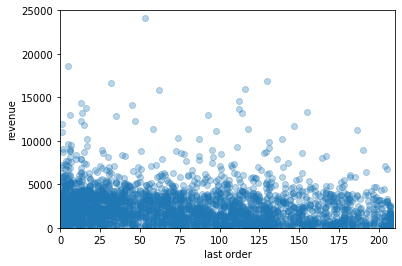

In [8]:
plt.scatter(x=clean_data['DAYSSINCELASTORDER'], y=clean_data['REVENUE'],alpha = 0.3
        )

plt.xlabel('last order')
plt.ylabel('revenue')
plt.ylim(0,25000)
plt.xlim(0,210)
plt.show

In [9]:
clean_data.sort_values('TOTAL_ORDERS')

,CustomerID,TOTAL_ORDERS,REVENUE,FIRST_ORDER_DATE,LATEST_ORDER_DATE,DAYSSINCELASTORDER
4545,106181,1,215.00,2021-04-01,2021-04-01,207
4477,95399,1,240.00,2021-04-01,2021-04-01,207
4827,150075,1,144.99,2021-04-01,2021-04-01,207
4828,150106,1,144.99,2021-04-01,2021-04-01,207
4829,150306,1,144.99,2021-04-01,2021-04-01,207
...,...,...,...,...,...,...
1156,88,109,7148.66,2016-08-01,2021-10-20,5
2576,47,111,8821.84,2017-03-22,2021-08-13,73
0,22,124,11986.54,2016-12-30,2021-10-24,1
2919,28,128,11127.82,2015-10-21,2021-07-19,98


### Applying RFM

In [22]:
PRESENT = dt.datetime(2021,10,25)

In [23]:
sales.REVENUE.describe()

count     5000.000000
mean      1681.523840
std       1998.618678
min         38.500000
25%        315.097500
50%        966.725000
75%       2493.072500
max      34847.400000
Name: REVENUE, dtype: float64

In [24]:
rfmTable = sales.groupby('CustomerID').agg({'LATEST_ORDER_DATE': lambda date: (PRESENT - date.max()).days, # Recency
                                        'TOTAL_ORDERS': lambda x: x,               # Frequency
                                        'REVENUE': lambda x: x.sum()})          # Monetary Value

rfmTable.rename(columns={'LATEST_ORDER_DATE': 'recency', 
                         'TOTAL_ORDERS': 'frequency', 
                         'REVENUE': 'monetary_value'}, inplace=True)

In [25]:
rfmTable

,recency,frequency,monetary_value
CustomerID,,,
1,53,61,34847.40
2,94,59,32486.98
3,53,53,24178.97
4,5,84,18554.49
5,130,26,16884.99
...,...,...,...
248709,54,2,59.95
248710,119,2,59.94
259042,128,2,51.94


In [26]:
rm = rfmTable

In [27]:
rm

,recency,frequency,monetary_value
CustomerID,,,
1,53,61,34847.40
2,94,59,32486.98
3,53,53,24178.97
4,5,84,18554.49
5,130,26,16884.99
...,...,...,...
248709,54,2,59.95
248710,119,2,59.94
259042,128,2,51.94


In [28]:
rm['r_quartile'] = pd.qcut(rfmTable['recency'], 3, ['1','2','3'])
rm['f_quartile'] = pd.qcut(rfmTable['frequency'], 3, ['3','2','1'])
rm['m_quartile'] = pd.qcut(rfmTable['monetary_value'], 3, ['3','2','1'])

In [29]:
rm.sort_values('r_quartile')

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile
CustomerID,,,,,,
13764,9,10,966.75,1,2,2
34649,1,4,555.98,1,3,2
34668,1,4,555.96,1,3,2
1885,1,24,2386.87,1,1,1
34793,1,4,554.66,1,3,2
...,...,...,...,...,...,...
69190,207,1,325.99,3,3,3
69024,207,5,326.78,3,2,3
3493,167,7,1839.75,3,2,2


In [30]:
rm['RFM_Score'] = rm.r_quartile.astype(str)+ rm.f_quartile.astype(str) + rm.m_quartile.astype(str)
rm.head(20)

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
1,53,61,34847.40,2,1,1,211
2,94,59,32486.98,2,1,1,211
3,53,53,24178.97,2,1,1,211
4,5,84,18554.49,1,1,1,111
5,130,26,16884.99,3,1,1,311
6,32,66,16693.78,2,1,1,211
7,116,81,15999.94,2,1,1,211
8,62,19,15840.36,2,1,1,211
9,112,75,14526.72,2,1,1,211


## Filter out Top/Best cusotmers (champions)

In [31]:
rm[rm['RFM_Score']=='111'].sort_values('monetary_value', ascending=False).head(1200)

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
4,5,84,18554.49,1,1,1,111
10,13,47,14309.92,1,1,1,111
12,16,79,13775.96,1,1,1,111
15,14,50,13180.85,1,1,1,111
17,6,36,12969.98,1,1,1,111
...,...,...,...,...,...,...,...
3148,2,23,1918.88,1,1,1,111
3186,9,21,1908.84,1,1,1,111
3244,9,20,1893.75,1,1,1,111


## Filter out Potential Customer

In [32]:
rm[rm['RFM_Score']=='211'].sort_values('monetary_value', ascending=False).head(1200)

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
1,53,61,34847.40,2,1,1,211
2,94,59,32486.98,2,1,1,211
3,53,53,24178.97,2,1,1,211
6,32,66,16693.78,2,1,1,211
7,116,81,15999.94,2,1,1,211
...,...,...,...,...,...,...,...
3219,33,30,1900.24,2,1,1,211
3237,56,38,1895.71,2,1,1,211
3249,55,21,1892.09,2,1,1,211


## Filter out those customers who need attention 

In [33]:
rm[rm['RFM_Score']=='333'].sort_values('monetary_value', ascending=False).head(1200)

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
49002,207,4,433.97,3,3,3,333
49984,207,4,426.96,3,3,3,333
50080,146,3,425.99,3,3,3,333
50273,207,2,424.98,3,3,3,333
50278,152,3,424.98,3,3,3,333
...,...,...,...,...,...,...,...
200783,207,2,94.14,3,3,3,333
209877,129,2,85.94,3,3,3,333
233068,205,3,69.89,3,3,3,333


In [34]:
rm[rm['RFM_Score']=='133'].sort_values('monetary_value', ascending=False).head(500)

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
49472,1,3,430.59,1,3,3,133
49631,1,2,429.80,1,3,3,133
49738,1,3,428.97,1,3,3,133
50017,1,2,426.50,1,3,3,133
50183,1,1,425.13,1,3,3,133
...,...,...,...,...,...,...,...
139649,12,2,158.95,1,3,3,133
146313,13,3,149.88,1,3,3,133
166940,4,2,124.94,1,3,3,133



# What sort of modelling & segmentation is best fit for this data?
### machine learning algorithm that’s suitable for customer segmentation problems is the k-means clustering algorithm. as we can see this is unsupervised learning problem which we have gather the in format where it is understandable and after it we will break them into groups which is 'active and no active customers'

# Explain your data modelling approach. 
### In this problem we first look for what kind data points we want and what is our goal so in order to achieve our goal first we need understand data. so in this problem we want to find our 'champions', 'Potential customers' and 'need attention' those customers first we look for there revenue means we first look how much spend during first oreder and last order. after this we will look there how many order they in that duration and then we will check for there last order days since they lsat order they ordered